# *Statistics coded*: Population structure and ageing

Prepared by [**Isabella Marinetti**](isabella.marinetti@studio.unibo.it) ([EMOS](https://ec.europa.eu/eurostat/web/european-statistical-system/emos)).

This notebook aims at reproducing the *Statistics Explained* article on [**population structure and ageing**](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Population_structure_and_ageing#The_share_of_elderly_people_continues_to_increase).

The original article looks at the impact of demographic ageing within the [European Union (EU)](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:European_Union_(EU)), considering EFTA countries (Norway, Liechtenstein, Switzerland and Iceland) and other potential member states, alongside with the United Kingdom. 
Consistently low birth rates and higher life expectancy are transforming the shape of the EU-27’s age pyramid; probably the most important change will be the marked transition towards a much older population structure, a development which is already apparent in several EU-27 Member States.

As a result, the proportion of people of working age in the EU-27 is shrinking while the relative number of those retired is expanding. This will, in turn, lead to an increased burden on those of working age to provide for the social expenditure required by the ageing population for a range of related services. 

## Configuration

1. Install the required packages:

In [1]:
#install.packages(c("ggplot2", tidyr", "plyr", "repr", "dplyr", "devtools", "restatapi","reshape2", "plotly", "forcats", "scales", "kableExtra", "knitr","IRdisplay"))

2. Load the packages:

In [2]:
library(ggplot2)
library(tidyr)
library(plyr)
library(repr)
library(dplyr)
library(devtools)
library(restatapi)
library(reshape2)
library(plotly)
library(forcats)
library(scales)
library(kableExtra)
library(knitr)
library(IRdisplay)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'plyr' was built under R version 3.6.2"Warning message:
"package 'repr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'devtools' was built under R version 3.6.3"Loading required package: usethis
Warning message:
"package 'usethis' was built under R version 3.6.3"Warning message:
"package 'restatapi' was built under R version 3.6.3"restatapi: - config file with the API version 1 loaded from GitHub (the 'current' API version 

## Past and future population ageing trends in the EU-27

### Figure 1: Population pyramids, EU-27, 2004 and 2019

Before loading the dataset "*Population on 1 January by age group and sex*" from [_Eurostat_ API](https://ec.europa.eu/eurostat/web/json-and-unicode-web-services/getting-started/rest-request) (with the id [_demo_pjangroup_](https://ec.europa.eu/eurostat/en/web/products-datasets/-/DEMO_PJANGROUP)) we need to define the subset of group ages (`ageclass`) we are interested in:

In [3]:
ageclass <- c("Y_LT5", "Y5-9", "Y10-14", "Y15-19", "Y20-24", "Y25-29", "Y30-34", "Y35-39", "Y40-44",
              "Y45-49", "Y50-54", "Y55-59", "Y60-64", "Y65-69", "Y70-74", "Y75-79", "Y80-84", "Y_GE85")

- Choose the dataset with the R function `get_eurostat_data`, filtering the data with the information we need: `geo` entity (`"EU27_2020"`), `time` (*2004* and *2019*), `sex` (`"M"`, `"F"`) and the group of `age` (`ageclass`):

In [4]:
assign("dmethod","curl",envir=.restatapi_env) 
dataset1 <- get_eurostat_data(id="demo_pjangroup", filters=list(geo="EU27_2020", age=ageclass, sex=c("M","F")), 
                              date_filter=c(2004,2019))

- Change the labels of the variable `age`, so that the graph will be more readable:

In [5]:
levels(dataset1$age) <- list("<5"="Y_LT5", "5-9"= "Y5-9", "10-14"= "Y10-14", 
                             "15-19"="Y15-19", "20-24"="Y20-24", "25-29"="Y25-29", 
                             "30-34"="Y30-34", "35-39"="Y35-39", "40-44"= "Y40-44",
                             "45-49"= "Y45-49", "50-54"= "Y50-54", "55-59"= "Y55-59", 
                             "60-64"="Y60-64", "65-69"="Y65-69", "70-74"="Y70-74", 
                             "75-79"="Y75-79", "80-84"="Y80-84", "85+" ="Y_GE85")

- Define the total amount of people for the two years, in this way it will be easier to compute the percentages:

In [6]:
tot2019 <- sum(dataset1[time=="2019"]$values)
tot2004 <- sum(dataset1[time=="2004"]$values)
head(dataset1)

unit,age,sex,geo,time,values
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
NR,10-14,F,EU27_2020,2004,12392609
NR,10-14,F,EU27_2020,2019,11322538
NR,10-14,M,EU27_2020,2004,13022330
NR,10-14,M,EU27_2020,2019,11947145
NR,15-19,F,EU27_2020,2004,13126800
NR,15-19,F,EU27_2020,2019,11227333


Use of the *options* function to control the size of the graphs (in this case: `width=5` and `height=5`):

In [7]:
options(repr.plot.width=5, repr.plot.height=5)

Use of the function `ggplot` to create the pyramid of age graph:
- create the space with `aes` (the variable  `age` on the x axis and `values` on the y axis, filling the bars with the two categories of `sex`: *male* and *female*),
- add the barplots with respect of `sex` and `time`: define a subspace to compute percentages, specify a minus (`-`) before the values of males, in this way the two barplots will be mirrored, add a colour (*orange* for females and *blue* for males) and the fill term to distinguish the reference year (solid colour for *2019*, bordered colour for *2004*),
- set the `coord_flip` function, so that the cartesian coordinates will be shown in a vertical way,
- add the `title`, `subtitle` and `caption`,
- specify the *theme*, in this case we choose the white background `theme_bw` with grid lines.

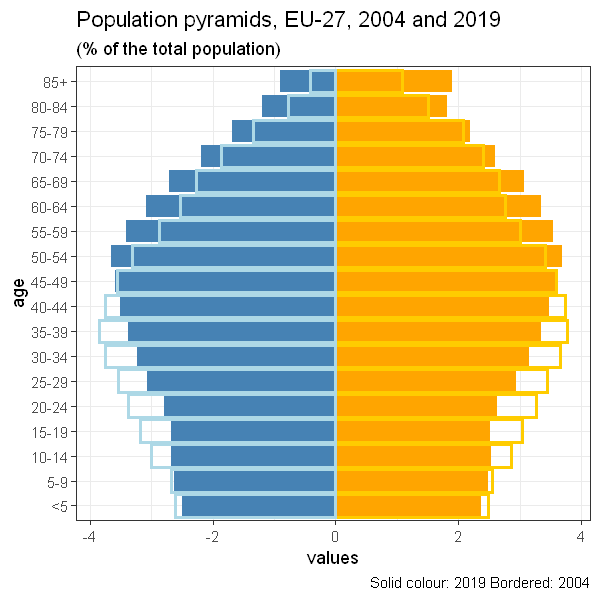

In [8]:
plot1 <- ggplot(dataset1, aes(x=age , y=values, fill= sex,)) + 

  geom_bar(data=subset(dataset1, sex == "F" & time=="2019" ),aes(y=(values)/tot2019*100), fill="orange", stat = "identity") + 
  geom_bar(data=subset(dataset1,sex == "M" &time=="2019"),aes(y=(-values)/tot2019*100), fill="steelblue", stat = "identity") +
  geom_bar(data=subset(dataset1, sex == "F" & time=="2004" ),aes(y=(values)/tot2004*100),fill="transparent", colour="#FFCC00", size=1, stat = "identity") + 
  geom_bar(data=subset(dataset1,sex == "M" &time=="2004"),aes(y=(-values)/tot2004*100), fill="transparent", colour="lightblue", size=1, stat = "identity") +
  scale_x_discrete(limits= c("<5","5-9", "10-14", "15-19","20-24","25-29","30-34", "35-39", "40-44","45-49","50-54","55-59","60-64","65-69","70-74", "75-79","80-84", "85+")) +
  coord_flip()+
  labs(title = "Population pyramids, EU-27, 2004 and 2019",
       subtitle = "(% of the total population)",
       caption = "Solid colour: 2019 Bordered: 2004") +
  theme_bw()
  
print(plot1)

### Figure 2:  Population pyramids, EU-27, 2019 and 2100

Load the dataset with the `R` function `get_eurostat_data`, filtering the data with the information we need: 
- first of all selecting the dataset *Population on 1st January by age, sex and type of projection* ([_proj_19np_](https://ec.europa.eu/eurostat/web/products-datasets/-/proj_19np)),
- `geo` entity: `"EU-27_2020"`,
- `time`: *2019* and *2100*,
- `sex`: `"M"`, `"F"`,
- finally, the *baseline* (`"BSL"`) projections.

In [9]:
assign("dmethod","curl",envir=.restatapi_env) 
dataset2 <- get_eurostat_data(id="proj_19np", 
                              filters=list(geo="EU27_2020", sex=c("M","F"), projection="BSL"))[time %in% c(2019,2100)]

- Define a value for the *total* amount of population in 2019 and 2100 to compute percentages.
- Delete the *total* amount of population from the dataset, so that it will not be visualized in the graph.

In [10]:
totproj2019 <- sum(dataset2[dataset2$time=="2019"& dataset2$age=="TOTAL"]$values)
totproj2100 <- sum(dataset2[dataset2$time=="2100" & dataset2$age=="TOTAL"]$values)
dataset2 <- filter(dataset2, dataset2$age!="TOTAL")

In the dataset `age` is not divided into five year classes. The main problem is that the variable `age` is a factor with levels ("Y1", "Y2", ...), so we firstly need to take only the part of the string concerning the number of years (1, 2, 3, ...) through the function `substr`.

Before applying the function, we need to rename the first and the last levels of the variable, so that they will have the same format for each year:

In [11]:
levels(dataset2$age)[levels(dataset2$age)=="Y_GE100"] <- "Y100"
levels(dataset2$age)[levels(dataset2$age)=="Y_LT1"] <- "Y0"

Then we need to transform the variable `age` from a factor to a character, in this way we can apply the function `substr`:
  - the function takes as input the variable of interest and then the specification of the *start* (the number of the first character to be returned) and the *stop*, in this case they will be *2* and *4*, because we want to extrapolate the number from 0 to 100, eliminating the "Y" part

In [12]:
dataset2$age <- as.character(dataset2$age)
dataset2$age <- substr(dataset2$age, 2,4)
head(dataset2)

unit,age,sex,projection,geo,time,values
<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>
PER,1,F,BSL,EU27_2020,2019,2101911
PER,1,F,BSL,EU27_2020,2100,1838642
PER,1,M,BSL,EU27_2020,2019,2211096
PER,1,M,BSL,EU27_2020,2100,1944673
PER,10,F,BSL,EU27_2020,2019,2324280
PER,10,F,BSL,EU27_2020,2100,1911172


- Trasform the variable `age` into a numeric one

In [13]:
dataset2$age <- as.numeric(dataset2$age)

- Order the dataset with respect to the numeric variable `age`

In [14]:
dataset2 <- dataset2[order(dataset2$age), ]

Only after these steps we can divide the vector of numbers into five years classes:
  
  - using the function `cut` we can divide the variable `age` into a specified number of `breaks`, defining also their `labels` and considering the right interval open:

In [15]:
dataset2$age <- cut(dataset2$age, breaks=c(0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,Inf), 
                   labels=c("<5","05-9","10-14","15-19","20-24","25-29","30-34","35-39","40-44","45-49",
                            "50-54","55-59","60-64","65-69","70-74","75-79","80-84","85+"), right=FALSE)

  - group the values for each age class with the function `group_by` in the new variable `value_tot`:

In [16]:
data <- dataset2 %>%
        group_by(age,sex,time) %>%
        summarise(value_tot=sum(values))
head(data)

`summarise()` regrouping output by 'age', 'sex' (override with `.groups` argument)


age,sex,time,value_tot
<fct>,<fct>,<fct>,<dbl>
<5,F,2019,10571075
<5,F,2100,9235374
<5,M,2019,11126001
<5,M,2100,9749771
05-9,F,2019,11118011
05-9,F,2100,9440604


Plot the pyramid of age using the function `ggplot`:
  - create the space with `aes` (the variable  `age` on the x axis and `values_tot` on the y axis, filling the bars with the two categories of `sex`: *male* and *female*),
  - add the barplots with respect of `sex` and `time`: define a subspace to compute percentages, specify a minus (`-`) before the values of males, in this way yhe two barplots will be mirrored, add a colour (*orange* for females and *blue* for males) and the fill term to distinguish the reference year (solid colour for *2100*, bordered colour for *2019*),
  - add the `title`, `subtitle` and `caption`,
  - set the `coord_flip` function, so that the cartesian coordinates will be shown in a vertical way,
  - specify the *theme*, in this case we choose the white background `theme_bw` with grid lines.

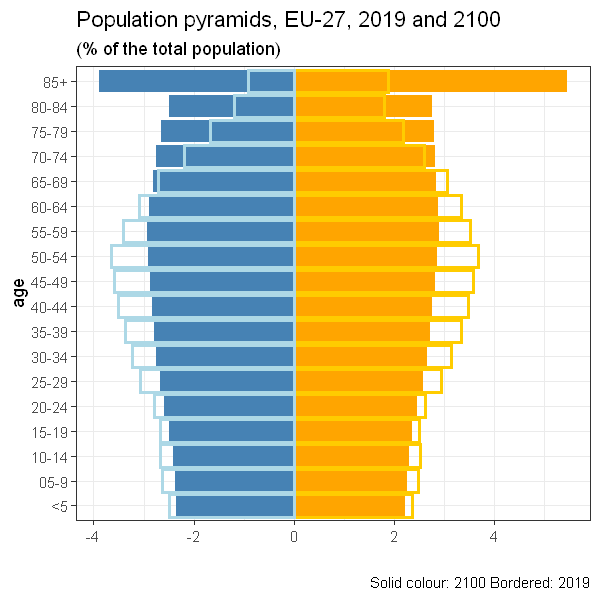

In [17]:
plot2 <- ggplot(data, aes(x=age , y=value_tot, fill= sex)) + 

  geom_bar(data=subset(data, sex == "F" & time=="2100" ),aes(y=(value_tot)/totproj2100*100), fill="orange", stat = "identity") + 
  geom_bar(data=subset(data,sex == "M" &time=="2100"),aes(y=(-value_tot)/totproj2100*100), fill="steelblue", stat = "identity") +
  geom_bar(data=subset(data, sex == "F" & time=="2019" ),aes(y=(value_tot)/totproj2019*100),fill="transparent", colour="#FFCC00", size=1, stat = "identity") + 
  geom_bar(data=subset(data,sex == "M" &time=="2019"),aes(y=(-value_tot)/totproj2019*100), fill="transparent", colour="lightblue", size=1, stat = "identity") +
  ylab("")+
  labs(title = "Population pyramids, EU-27, 2019 and 2100",
       subtitle = "(% of the total population)",
       caption = "Solid colour: 2100 Bordered: 2019")+
  coord_flip()+
  theme_bw()

print(plot2)

### Figure 3: Population structure by major age groups, EU-27, 2019-2100

Load the dataset with the R function `get_eurostat_data`, filtering the data with the information we need: 
  - first of all selecting the dataset "*Demographic balances and indicators by type of projection*" ([_proj_19ndbi_](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=proj_19ndbi&lang=fr)),
  - geopolitical entity (`"EU-27_2020"`),
  - time (from *2019* to *2100*, by ten years),
  - baseline (`"BSL"`) projections,
  - and the demographic indicator (`indic_de`) with the indicators relevant for the analysis: proportion of population aged 0-14 (`"PC_Y0_14"`), proportion of population aged 15-64 (`"PC_Y15_64"`), proportion of population aged 65 years and more (`"PC_Y65_MAX"`), proportion of population aged 80 years and more (`"PC_Y80_MAX"`).

In [18]:
assign("dmethod","curl",envir=.restatapi_env) 
dataset3 <- get_eurostat_data(id="proj_19ndbi", filters=list(geo="EU27_2020", projection="BSL", indic_de=c("PC_Y0_14", "PC_Y15_64","PC_Y65_MAX","PC_Y80_MAX")))[time %in% c(2019, 2030,2040,2050,2060,2070,2080,2090,2100)]

Problem: in the variable `indic_de` the level "65+" considers also the values for the level "85+", there is an overlapping of percentages, we need to create a new level "65-79". 
To overcome this problem we need to define a vector (`years`) to be used in the for loop that will subtract the value of "80+" (`"PC_Y80_MAX"`) from the category "65+" (`"PC_Y65_MAX"`) when the years coincide:

In [19]:
years <-c("2019","2030","2040","2050","2060","2070","2080","2090","2100")

for(i in 1:length(years)){
    year <-years[i]
    dataset3[dataset3$time==year & dataset3$indic_de=="PC_Y65_MAX", 5]<-dataset3[dataset3$time==year & dataset3$indic_de=="PC_Y65_MAX", 5] 
                                                                      - dataset3[dataset3$time==year & dataset3$indic_de=="PC_Y80_MAX", 5]
}

Rename the levels of the variable `indic_de` to provide a better visualization of the graph:

In [20]:
levels(dataset3$indic_de) <- list("0-14"="PC_Y0_14", "15-64"= "PC_Y15_64", "65-79"= "PC_Y65_MAX", "80+"="PC_Y80_MAX")
head(dataset3)

projection,indic_de,geo,time,values
<fct>,<fct>,<fct>,<fct>,<dbl>
BSL,0-14,EU27_2020,2019,15.2
BSL,0-14,EU27_2020,2030,14.0
BSL,0-14,EU27_2020,2040,13.6
BSL,0-14,EU27_2020,2050,13.7
BSL,0-14,EU27_2020,2060,13.6
BSL,0-14,EU27_2020,2070,13.6


Modify the visualization options:

In [21]:
options(repr.plot.width=7, repr.plot.height=6)

Compute the stack barplot using the function `ggplot`:
  - create the space with *aes* (the variable  `time` on the x axis and `values` on the y axis, filling the bars with the categories of `indic_de`: *0-14*, *15-64*, *65-79*, *80+*), 
  - add the barplots: define a space where the stacked bars have the youngest years (*0-14*) at the bottom and the eldest (*80+*) at the top, 
  - define the function `scale_fill_manual` to fill the stacked bar with specific colours with respect to the variable `indic_de`,
  - add the title and subtitle, 
  - specify the *theme*, in this case we choose the white background with grid lines.

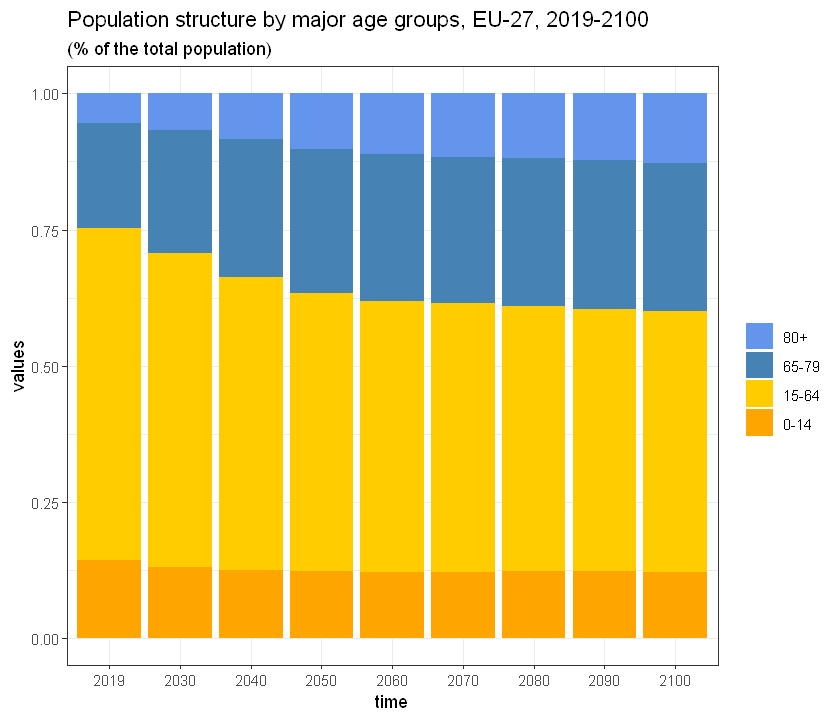

In [22]:
plot3 <- ggplot(dataset3, aes(x=time,y=values, fill=indic_de))+
         geom_bar(aes(x=time, y=values, fill = fct_rev(indic_de)),position=position_fill(reverse=F), stat="identity")+
         scale_fill_manual(name="",values=c( "cornflowerblue","steelblue", "#FFCC00","orange"))+   
         labs(title = "Population structure by major age groups, EU-27, 2019-2100",
              subtitle = "(% of the total population)")+
         theme_bw()

print(plot3)

### Figure 4: Projected total-age and old-age dependency ratio, EU-27, 2019-2100

We use the same dataset as before (*Demographic balances and indicators by type of projection*, _proj_19ndbi_), but this time we need to consider different demographic indicators (`indic_de`): 
- `"DEPRATIO1"`, the total-age dependency ratio (population aged 0-14 and population 65 and more over the population 15-64 years),
- `"OLDDEP1"`, the old-age dependency ratio (population 65 and over to population 15-64 years).

Moreover, we take the time axis from *2019* to *2100* by five years.

In [23]:
assign("dmethod","curl",envir=.restatapi_env) 
dataset4 <- get_eurostat_data(id="proj_19ndbi", filters=list(geo="EU27_2020", projection="BSL", indic_de=c("OLDDEP1","DEPRATIO1")))[time %in% c(2019,2020, 2025, 2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100)]

Before plotting the graph we need to change the years from *characters* to *numeric* values (this is important for graphical visualization)

In [24]:
dataset4$time <- as.numeric(as.character(dataset4$time))
head(dataset4)

projection,indic_de,geo,time,values
<fct>,<fct>,<fct>,<dbl>,<dbl>
BSL,DEPRATIO1,EU27_2020,2019,54.9
BSL,DEPRATIO1,EU27_2020,2020,55.5
BSL,DEPRATIO1,EU27_2020,2025,58.3
BSL,DEPRATIO1,EU27_2020,2030,61.8
BSL,DEPRATIO1,EU27_2020,2035,65.8
BSL,DEPRATIO1,EU27_2020,2040,69.8


And we modify the visualization options:

In [25]:
options(repr.plot.width=10, repr.plot.height=5)

Compute the line graph using the function `ggplot`:
- create the space with `aes` (the variable  `time` on the x axis and `values` on the y axis, grouping the values by the variable `indic_de`, 
- add the lines with a thickness (`size`) equal to 1,
- define the function `scale_colour_manual` to colour the lines with respect to the categories of the variable `indic_de`,
- add the title,
- add the `scale_y_continuous` and `scale_x_continuous` to specify the length of the y and x axis,
- add a title for the y axis,
- indicate the position of the legend, 
- specify the *theme*, in this case we choose the white background with grid lines.

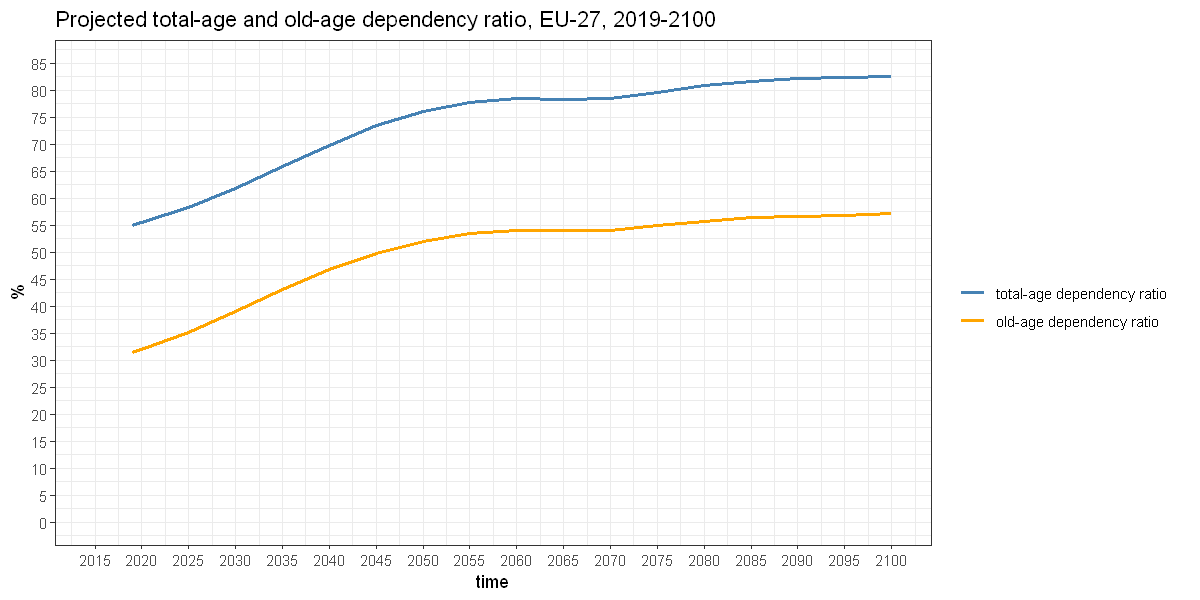

In [26]:
plot4 <- ggplot(data=dataset4, aes(x=time, y=values, group=factor(indic_de), color=factor(indic_de))) + 
         geom_line(size=1) +
         scale_color_manual(labels = c("total-age dependency ratio","old-age dependency ratio"), values = c( "steelblue","orange"), name = " ") +
         ggtitle("Projected total-age and old-age dependency ratio, EU-27, 2019-2100") +
         scale_y_continuous(limits = c(0, 85), breaks = seq(0, 85, by = 5)) +
         scale_x_continuous(limits = c(2015,2100), breaks =seq(2015, 2100, by = 5)) +
         ylab("%") +
         theme(legend.position="bottom")+
         theme_bw() 

print(plot4)

## The share of elderly people continues to increase

Before loading the dataset we need to set the vector `countries` that we will use as filter while selecting data

In [27]:
countries <- as.factor(c("EU27_2020","BE", "BG","CZ","DK", "DE", "EE","IE","EL","ES","FR",
                          "HR", "IT","CY","LV","LT","LU","HU","MT","NL","AT","PL","PT","RO",
                          "SI","SK","FI","SE","UK","IS","LI","NO","CH","ME", "MK", "AL", "RS","TR"))

We load the dataset "*Population: Structure indicators*" ([_demo_pjanind_](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=demo_pjanind&lang=en)):
  - filter the data using the vector `countries`, 
  - select from the variable `indic_de` the category: 
    + `"PC_Y65_MAX"` (population 65+ years old) for *Table 1* and *Figure 5*,
    + `"PC_Y0_14"` (population 0-14 years old), `"PC_Y15_24"` (population 15-24 years old), `"PC_Y25_49"` (population 25-49 years old), `"PC_Y50_64"` (population 50-64 years old) for *Table 1*,
    + `"MEDAGEPOPv` (median age) for *Figure 6*,
    + `"YOUNGDEP1"` (young age dependency ratio), `"OLDDEP1"` (old age dependency ratio), `"DEPRATIO1"` (total age dependency ratio), `"PC_Y80_MAX"` (proportion of population 80 years old or more) for *Table 2*,
  - select the years *2009* and *2019*.

In [28]:
assign("dmethod","curl",envir=.restatapi_env) 
dataset <- get_eurostat_data(id="demo_pjanind", filters=list(geo=countries, indic_de=c("PC_Y0_14","PC_Y15_24","PC_Y25_49","PC_Y50_64","PC_Y65_MAX" ,"MEDAGEPOP", "YOUNGDEP1","OLDDEP1","DEPRATIO1","PC_Y80_MAX")), date_filter=c(2009,2019))

### Table 1: Population age structure by major age groups, 2009 and 2019

Create a vector `x` to filter the dataset with the demographic indicators of interest:

In [29]:
x <- c("PC_Y0_14","PC_Y15_24","PC_Y25_49","PC_Y50_64","PC_Y65_MAX")

Create a new dataset from a subset of the one loaded from the _Eurostat_ API with respect to the vectors of demographic indicators of interest:

In [30]:
dataset5 <- subset(dataset, dataset$indic_de %in% x)

- Since we are interested in three major age groups (0-14, 15-64 and 65+), we need to sum the values of the three categories "15-24" (`"PC_Y15_24"`), "25-49" (`"PC_Y25_49"`) and "50-64" (`"PC_Y50_64"`) with a `for` loop:

In [31]:
times <- c(2009,2019)

for(i in 1:length(times)){
    year <- times[i]
    dataset5[dataset5$time==year & dataset5$indic_de=="PC_Y15_24", 4] <- dataset5[dataset5$time==year & dataset5$indic_de=="PC_Y15_24", 4]+
                                                                         dataset5[dataset5$time==year & dataset5$indic_de=="PC_Y25_49", 4]+
                                                                         dataset5[dataset5$time==year & dataset5$indic_de=="PC_Y50_64", 4]
}

- Only after that we can rename the level `"PC_Y15_24"` into `"PC_Y15_64"`:

In [32]:
levels(dataset5$indic_de)[levels(dataset5$indic_de)=="PC_Y15_24"] <- "PC_Y15_64"

- And then delete the values for the categories `"PC_Y25_49"` and `"PC_Y50_64"`, now included in the cateogory 15-64:

In [33]:
dataset5 <- dataset5[dataset5$indic_de!="PC_Y25_49" & dataset5$indic_de!="PC_Y50_64",]
head(dataset5)

indic_de,geo,time,values
<fct>,<fct>,<fct>,<dbl>
PC_Y0_14,AL,2009,23.3
PC_Y0_14,AL,2019,17.2
PC_Y0_14,AT,2009,15.1
PC_Y0_14,AT,2019,14.4
PC_Y0_14,BE,2009,16.9
PC_Y0_14,BE,2019,16.9


- Create vectors for each year (2009 or 2019) of the category ("0-14": `"PC_Y0_14"`, "15-64": `"PC_Y15_64"`, "65+": `"PC_Y65_MAX"`),
- Order them with respect to the vector `countries`, previously defined.

In [34]:
age0_14_2009 <- dataset5[dataset5$indic_de=="PC_Y0_14" & dataset5$time=="2009", -c(1,3)]
age0_14_2019 <- dataset5[dataset5$indic_de=="PC_Y0_14" & dataset5$time=="2019", -c(1,3)]

age0_14_2009 <- age0_14_2009[order(factor(age0_14_2009$geo, levels=unique(countries))),-1]
age0_14_2019 <- age0_14_2019[order(factor(age0_14_2019$geo, levels=unique(countries))),-1]

In [35]:
age15_64_2009 <- dataset5[dataset5$indic_de=="PC_Y15_64" & dataset5$time=="2009", -c(1,3)]
age15_64_2019 <- dataset5[dataset5$indic_de=="PC_Y15_64" & dataset5$time=="2019", -c(1,3)]

age15_64_2009 <- age15_64_2009[order(factor(age15_64_2009$geo, levels=unique(countries))),-1]
age15_64_2019 <- age15_64_2019[order(factor(age15_64_2019$geo, levels=unique(countries))),-1]

In [36]:
age65_MAX_2009 <- dataset5[dataset5$indic_de=="PC_Y65_MAX" & dataset5$time=="2009", -c(1,3)]
age65_MAX_2019 <- dataset5[dataset5$indic_de=="PC_Y65_MAX" & dataset5$time=="2019", -c(1,3)]

age65_MAX_2009 <- age65_MAX_2009[order(factor(age65_MAX_2009$geo, levels=unique(countries))),-1]
age65_MAX_2019 <- age65_MAX_2019[order(factor(age65_MAX_2019$geo, levels=unique(countries))),-1]

- Define the vector `cntr` with the name of the countries (not just the code) to make the table more comprehensible

In [37]:
cntr <- as.factor(c("EU-27", "Belgium", "Bulgaria", "Czechia", "Denmark", "Germany", "Estonia", "Ireland",
                    "Greece", "Spain", "France", "Croatia", "Italy", "Cyprus", "Latvia", "Lithuania",
                    "Luxembourg", "Hungary", "Malta", "Netherlands", "Austria", "Poland","Portugal", "Romania",
                    "Slovenia", "Slovakia", "Finland", "Sweden","United Kingdom", "Iceland", "Liechtenstein",
                    "Norway", "Switzerland", "Montenegro", "North Macedonia", "Albania", "Serbia", "Turkey"))

At this point, we can merge the different vectors and create the table with the function `cbind` and rename the columns:

In [38]:
dt <- cbind(cntr, age0_14_2009, age0_14_2019, age15_64_2009,age15_64_2019, age65_MAX_2009,age65_MAX_2019 )
colnames(dt) <- c("Countries ", "2009", "2019","2009","2019","2009","2019")
head(dt)

Countries,2009,2019,2009,2019,2009,2019
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EU-27,15.4,15.2,67.1,64.6,17.4,20.3
Belgium,16.9,16.9,66.0,64.2,17.1,18.9
Bulgaria,13.1,14.4,68.9,64.3,18.0,21.3
Czechia,14.2,15.9,70.9,64.6,14.9,19.6
Denmark,18.3,16.5,65.8,63.9,15.9,19.6
Germany,13.6,13.6,66.0,64.8,20.4,21.5


Display the table with the function `kable`:
  - `kable_styling`: define the layout of the table,
  - `add_header_above`: add grouped column names,
  - `row`/`column_spec`: add features to rows or columns,
  - `group_rows`: define grouped rows,
  - `display_html`: display the table below the code.

In [39]:
dt %>%
  kable("html")%>%
  kable_styling(c("striped", "bordered")) %>%
  add_header_above(c("-" = 1, "0-14 years old" = 2, "15-64 years old" = 2, "65 years old or over" = 2), background='bisque') %>%
  row_spec(0, background = 'bisque') %>%  
  row_spec(1, background='orange',bold=TRUE) %>%
  column_spec(1, bold=TRUE) %>%
  group_rows(" ", 29,30) %>%
  group_rows(" ", 30,34) %>%
  group_rows(" ", 34,38) %>%
  as.character() %>%
  display_html()


- 
 0-14 years old 
 15-64 years old 
 65 years old or over 
 
 
 Countries 
 2009 
 2019 
 2009 
 2019 
 2009 
 2019 
 
 
 
 
 EU-27 
 15.4 
 15.2 
 67.1 
 64.6 
 17.4 
 20.3 
 
 
 Belgium 
 16.9 
 16.9 
 66.0 
 64.2 
 17.1 
 18.9 
 
 
 Bulgaria 
 13.1 
 14.4 
 68.9 
 64.3 
 18.0 
 21.3 
 
 
 Czechia 
 14.2 
 15.9 
 70.9 
 64.6 
 14.9 
 19.6 
 
 
 Denmark 
 18.3 
 16.5 
 65.8 
 63.9 
 15.9 
 19.6 
 
 
 Germany 
 13.6 
 13.6 
 66.0 
 64.8 
 20.4 
 21.5 
 
 
 Estonia 
 14.9 
 16.4 
 67.6 
 63.8 
 17.4 
 19.8 
 
 
 Ireland 
 20.6 
 20.5 
 68.5 
 65.4 
 10.9 
 14.1 
 
 
 Greece 
 14.6 
 14.3 
 66.6 
 63.6 
 18.8 
 22.0 
 
 
 Spain 
 14.8 
 14.8 
 68.6 
 65.8 
 16.6 
 19.4 
 
 
 France 
 18.5 
 18.0 
 65.0 
 61.9 
 16.5 
 20.1 
 
 
 Croatia 
 15.4 
 14.4 
 66.7 
 65.0 
 17.9 
 20.6 
 
 
 Italy 
 14.1 
 13.2 
 65.7 
 64.1 
 20.3 
 22.8 
 
 
 Cyprus 
 17.7 
 16.1 
 69.9 
 67.8 
 12.5 
 16.1 
 
 
 Latvia 
 14.1 
 15.9 
 68.1 
 63.9 
 17.8 
 20.3 
 
 
 Lithuania 
 15.1 
 15.1 
 67.7 
 65.1 
 17.2 
 19.8 
 
 
 Luxembourg 
 18.0 
 16.1 
 68.0 
 69.6 
 14.0 
 14.4 
 
 
 Hungary 
 14.9 
 14.5 
 68.8 
 66.1 
 16.4 
 19.3 
 
 
 Malta 
 15.6 
 13.7 
 70.1 
 67.7 
 14.2 
 18.7 
 
 
 Netherlands 
 17.7 
 15.9 
 67.3 
 65.0 
 15.0 
 19.2 
 
 
 Austria 
 15.1 
 14.4 
 67.5 
 66.6 
 17.4 
 18.8 
 
 
 Poland 
 15.3 
 15.4 
 71.2 
 67.0 
 13.5 
 17.7 
 
 
 Portugal 
 15.4 
 13.7 
 66.5 
 64.4 
 18.0 
 21.8 
 
 
 Romania 
 15.8 
 15.7 
 68.1 
 65.9 
 16.1 
 18.5 
 
 
 Slovenia 
 14.0 
 15.1 
 69.6 
 65.1 
 16.4 
 19.8 
 
 
 Slovakia 
 15.6 
 15.7 
 72.1 
 68.2 
 12.2 
 16.0 
 
 
 Finland 
 16.7 
 16.0 
 66.5 
 62.3 
 16.7 
 21.8 
 
 
 Sweden 
 16.7 
 17.8 
 65.5 
 62.3 
 17.8 
 19.9 
 
 
 
 United Kingdom 
 17.7 
 17.9 
 66.2 
 63.7 
 16.1 
 18.4 
 
 
 
 Iceland 
 20.8 
 19.0 
 67.5 
 66.8 
 11.6 
 14.2 
 
 
 Liechtenstein 
 16.4 
 14.7 
 70.7 
 67.4 
 12.9 
 17.9 
 
 
 Norway 
 19.0 
 17.5 
 66.3 
 65.2 
 14.7 
 17.2 
 
 
 Switzerland 
 15.3 
 15.0 
 68.0 
 66.5 
 16.6 
 18.5 
 
 
 
 Montenegro 
 19.6 
 18.0 
 67.4 
 67.0 
 12.9 
 15.2 
 
 
 North Macedonia 
 18.1 
 16.4 
 70.4 
 69.6 
 11.5 
 14.1 
 
 
 Albania 
 23.3 
 17.2 
 66.3 
 68.7 
 10.4 
 14.1 
 
 
 Serbia 
 15.3 
 14.3 
 67.5 
 65.2 
 17.1 
 20.4 
 
 
 Turkey 
 26.3 
 23.4 
 66.9 
 67.8 
 6.8 
 8.8

### Figure 5: Increase in the share of the population aged 65 years or over between 2009 and 2019

Select the part of the dataset regarding the *population 65+ years* of the variable `indic_de`.

In [40]:
dataset6 <- dataset[dataset$indic_de=="PC_Y65_MAX",]

We have to plot the difference (in percentages) of the population with 65+ years between 2009 and 2019.
We compute these differences in the percentage points with a `for` loop, assigning the resulting values to the category *2009* of the variable `time`:

In [41]:
for(i in 1:length(countries)){
    countries_65 <-countries[i]
    dataset6[dataset6$geo==countries_65 & dataset6$time==2009, 4]<-dataset6[dataset6$geo==countries_65 & dataset6$time==2019, 4]-
                                                                dataset6[dataset6$geo==countries_65 & dataset6$time==2009, 4]
                                                                          
}

Delete the rows of the category *2019* of the variable `time` (the values of the differences are stored in the category *2009*):

In [42]:
dataset6 <- dataset6[dataset6$time!=2019]
head(dataset6)

indic_de,geo,time,values
<fct>,<fct>,<fct>,<dbl>
PC_Y65_MAX,AL,2009,3.7
PC_Y65_MAX,AT,2009,1.4
PC_Y65_MAX,BE,2009,1.8
PC_Y65_MAX,BG,2009,3.3
PC_Y65_MAX,CH,2009,1.9
PC_Y65_MAX,CY,2009,3.6


Transform the dataset into a matrix, renaming the rows as the countries and deleting the variable `time` and `indic_de`:

In [43]:
dataset6 <- as.matrix(dataset6[,-c(1,3)], rownames = dataset6$geo)
head(dataset6)

,geo,values
AL,AL,3.7
AT,AT,1.4
BE,BE,1.8
BG,BG,3.3
CH,CH,1.9
CY,CY,3.6


Order the dataset with respect to the variable `values` in decreasing order:

In [44]:
data <- dataset6[order(dataset6[,2], decreasing=TRUE),]
head(data)

,geo,values
FI,FI,5.1
LI,LI,5.0
CZ,CZ,4.7
MT,MT,4.5
NL,NL,4.2
PL,PL,4.2


Use the function `which` to know the index of the rows of specific countries: European Union, United Kingdom, EFTA Members, or Candidate Members

In [45]:
which(data %in% "EU27_2020")
which(data %in% "UK")
which(data %in% c("LI","CH","NO","IS"))
which(data %in% c("TR","RS","MK","ME","AL"))

[1] 18

[1] 31

[1]  2 22 27 34

[1]  9 15 24 30 33

Merge the dataset by row, creating a new matrix divided into subgroups (*EU, EU members, EFTA members, Candidate countries*), using the indexes found 

In [46]:
data <- rbind(data[18,], 0, data[c(-2,-9,-15,-18,-22,-24,-27,-31,-30,-33,-34),],0,data[31,],0, data[c(2,22,27,34), ], 0, data[c(9,15,24,30,33),])

Rename the rows of the "one member" groups

In [47]:
rownames(data)[1] <- "EU-27"
rownames(data)[31] <- "UK"

Modify the visualization options

In [48]:
options(repr.plot.width=20, repr.plot.height=10)

Plot the graph with the function `barplot` (we cannot use `gglot` because we are dealing with matrices):
  - select the dataset and apply a table `t` function, in this way the data are correctly set for the barplot,
  - `col`: define the colour of the bars,
  - `ylim`/`ylab`: expand and rename the y axis, 
  - `main`/`cex.main`: title of the plot (`main`) and the size of the font (`cex.main`),
  - `names.arg`/`cex.names`: put the name of the country as the name of each bar and define their sizes,
  - add a `grid` to compare more easily the values

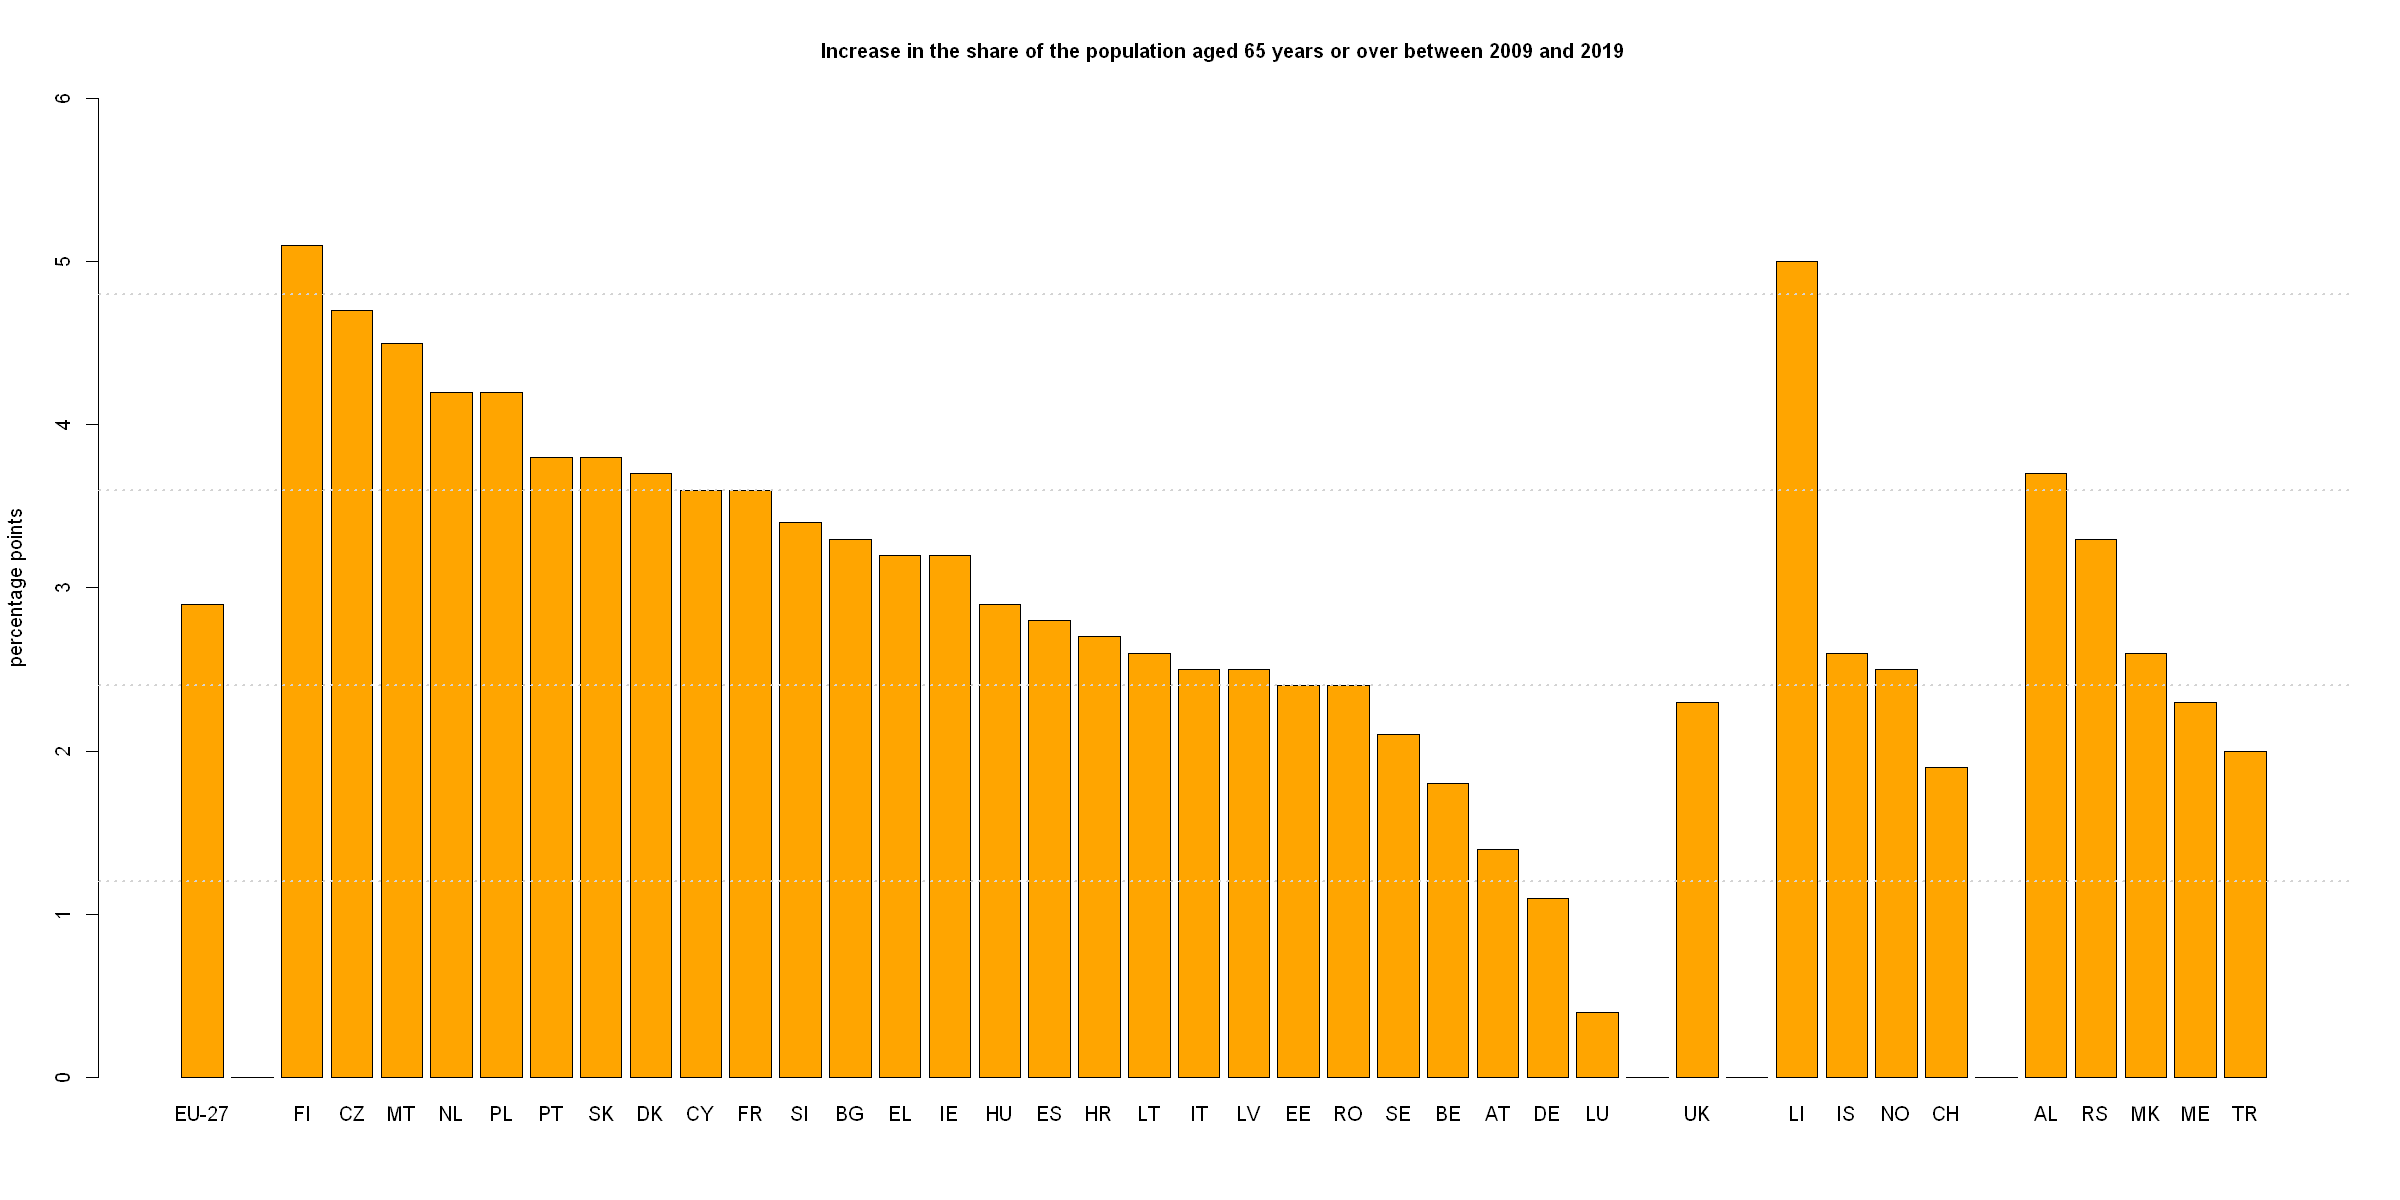

In [49]:
barplot(t(data[,2]), col = "orange", ylim=c(0,6), ylab= "percentage points", 
        main = "Increase in the share of the population aged 65 years or over between 2009 and 2019", 
        cex.main=1, names.arg=row.names(data), cex.names=1)

grid(NA,5,lwd=2,col="lightgrey")


## Median age is highest in Italy
 
### Figure 6: Median age of population, 2009 and 2019

Select the part of the dataset regarding the *median age* of each country and divide it into two subsets:

In [50]:
dt2019 <- dataset[dataset$indic_de=="MEDAGEPOP"&dataset$time==2019,]
dt2009 <- dataset[dataset$indic_de=="MEDAGEPOP"&dataset$time==2009,]

Rename the variable `values` for the two dataset:

In [51]:
names(dt2019)[4] <- "values2019"
names(dt2009)[4] <- "values2009"

- **Merge** the two dataset into a new one, with respect to the variable `geo`.
- Delete the columns not necessary for the analysis.
- **Order** the dataset with respect to the values of *2019*.

In [52]:
data2 <- merge(x=dt2019, y=dt2009, by="geo")
data2 <- data2[,-c(2,3,5,6)]
data2 <- data2[order(data2[,2],decreasing=T),]
head(data2)

geo,values2019,values2009
<fct>,<dbl>,<dbl>
IT,46.7,43.0
DE,46.0,43.7
PT,45.2,40.8
EL,44.9,40.7
BG,44.5,42.0
LI,44.2,40.3


Transform the dataset into a `matrix` (notice that now the matrix has *char* values):

In [53]:
data2<-as.matrix(data2, rownames=data2$geo)
head(data2)

,geo,values2019,values2009
IT,IT,46.7,43.0
DE,DE,46.0,43.7
PT,PT,45.2,40.8
EL,EL,44.9,40.7
BG,BG,44.5,42.0
LI,LI,44.2,40.3


Use the function `which` to know the index of the rows of specific countries: European Union, United Kingdom, EFTA Members, or Candidate Members.

In [54]:
which(data2 %in% "EU27_2020")
which(data2 %in% "UK")
which(data2 %in% c("LI","CH","NO","IS"))
which(data2 %in% c("TR","RS","MK","ME","AL"))

[1] 11

[1] 28

[1]  6 19 30 37

[1] 12 32 33 36 38

Delete from the dataset the column referring to the countries (this information is already contained in the row indexes)

In [55]:
data2 <- data2[,-1]

Change the *class* of the matrix into a numeric one:

In [56]:
class(data2) <- "numeric"
head(data2)

,values2019,values2009
IT,46.7,43.0
DE,46.0,43.7
PT,45.2,40.8
EL,44.9,40.7
BG,44.5,42.0
LI,44.2,40.3


Merge the dataset by row, creating a new matrix divided into subgroups (*EU, EU members, EFTA members, Candidate countries*), with respect to their indexes in the dataset

In [57]:
data2 <- rbind(data2[11,], 0, data2[-c(11,28,6,19,30,37,12,32,33,36,38),],0,data2[28,],0, data2[c(6,19,30,37), ], 0, data2[c(12,32,33,36,38),])

Rename the rows of the "one member" groups

In [58]:
rownames(data2)[1] <- "EU-27"
rownames(data2)[31] <- "UK"

Plot the graph with the function `barplot` (we cannot use `gglot` because we are dealing with matrices):
- select the dataset and apply a table `t` function, in this way the data are correctly set for the barplot,
- `ylim`: expand the y axis,
- `col`: define the colour of the bars (with respect to *2009* and *2019*,
- `main`/`cex.main`: title of the plot (`main`) and the size of the font (`cex.main`),
- `names.arg`/`cex.names`: put the name of the country as the name of each bar and define their sizes,
- add a `legend` function,
- add a `grid` to compare more easily the values.

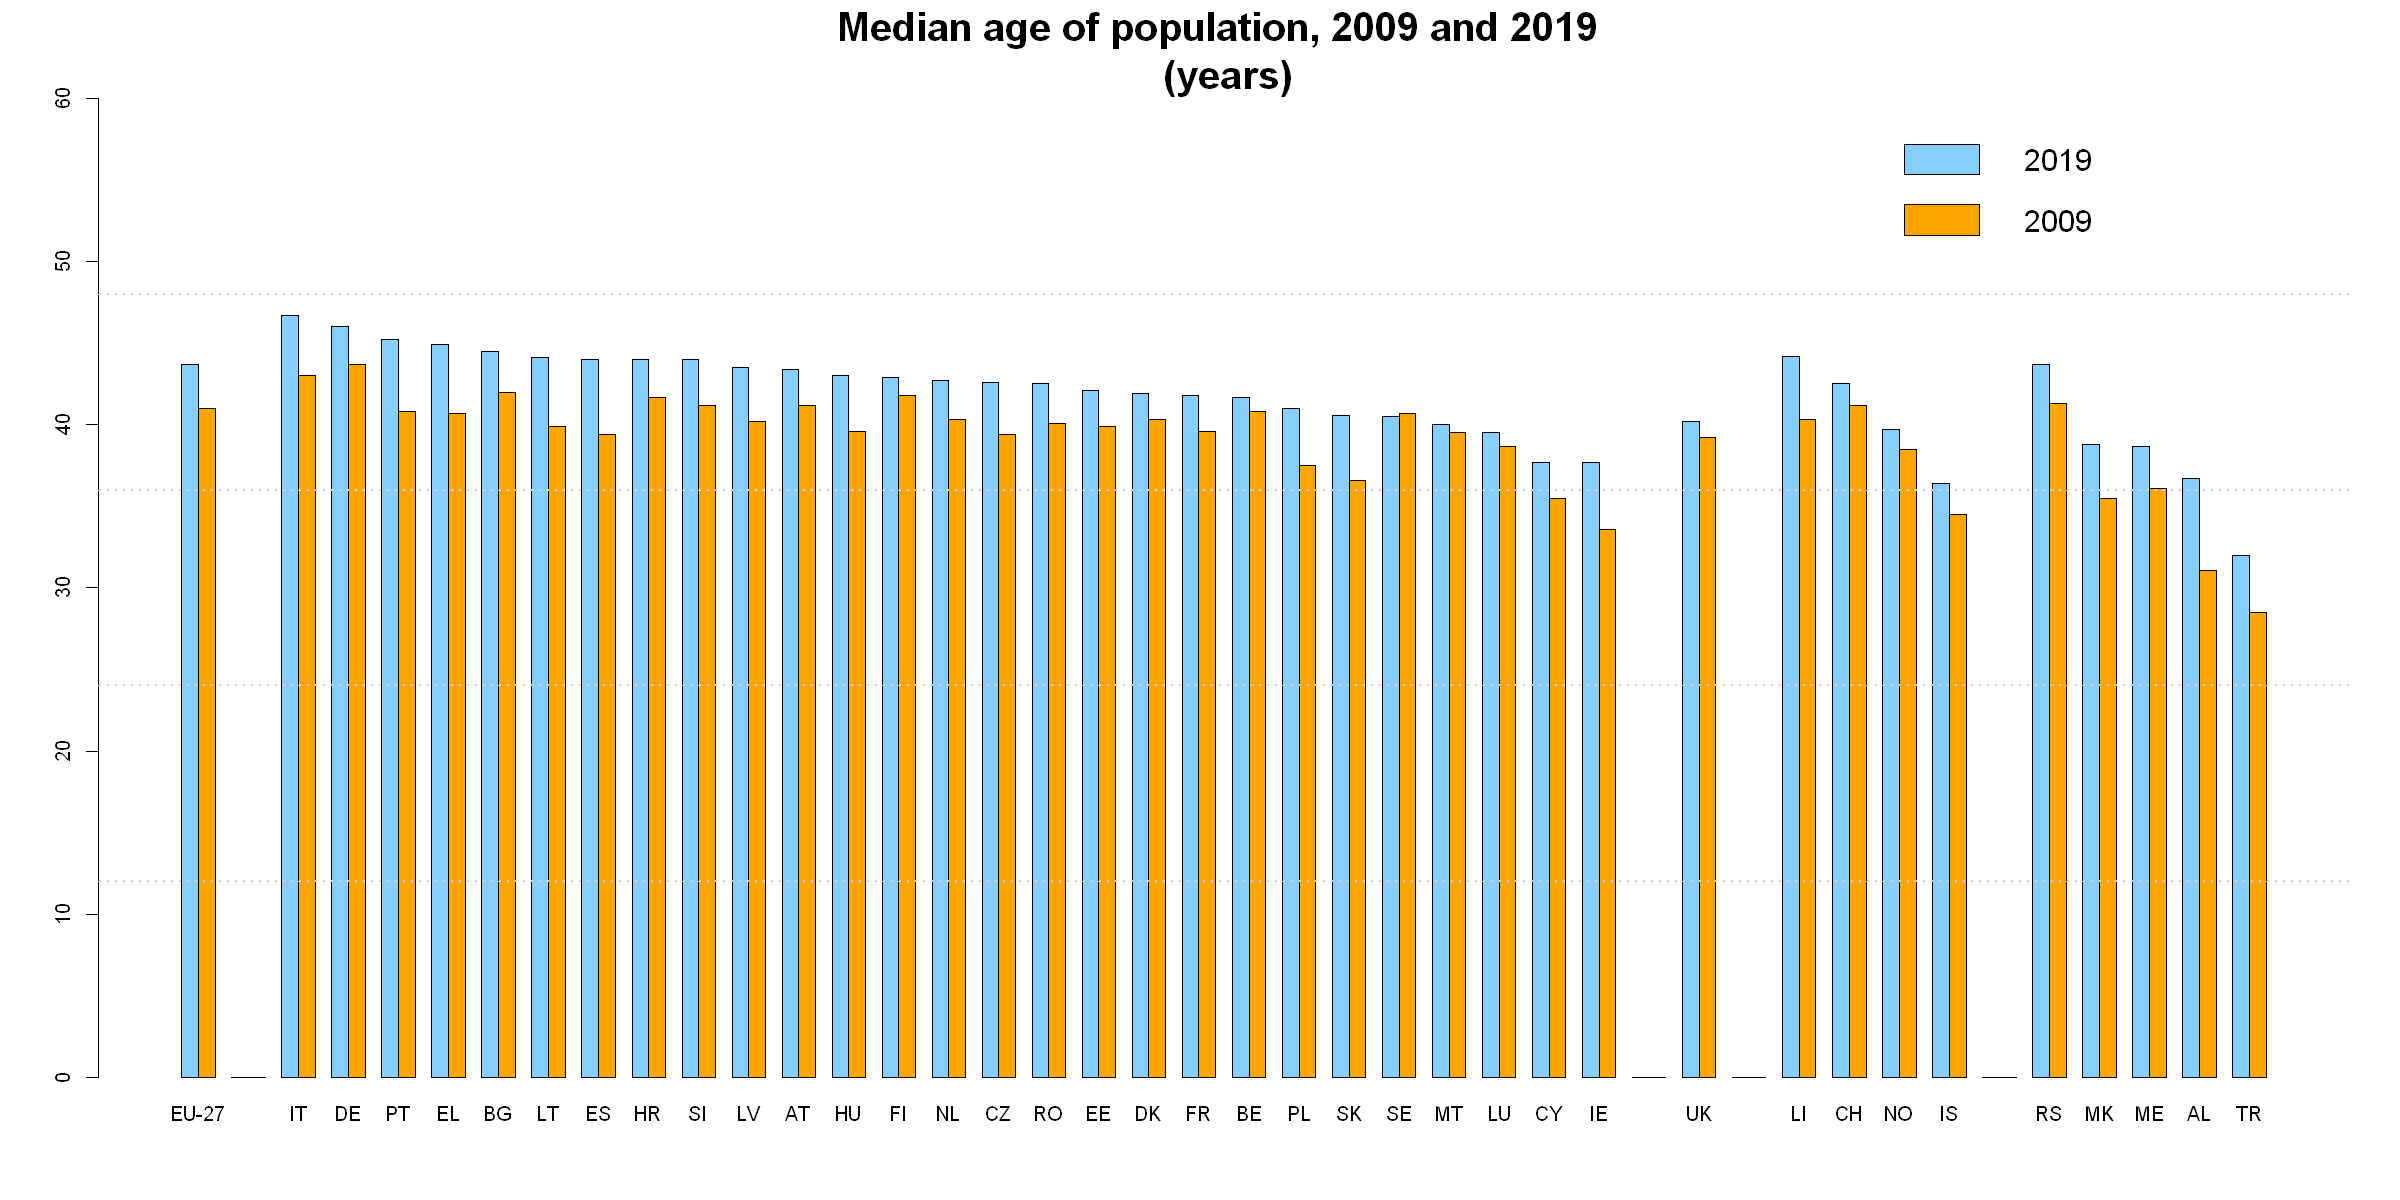

In [59]:
barplot(t(data2), ylim=c(0,60), beside = T, col = c("lightskyblue","orange"), main = "Median age of population, 2009 and 2019 \n (years)",
        cex.main=2, names.arg=row.names(data2), cex.names=1)

legend("topright", legend =c("2019","2009"), fill = c("lightskyblue","orange"), bty="n", box.lty=4, pt.cex=1, cex=1.5, adj=0.7)

grid(NA,5,lwd=2,col="lightgrey")


## Slightly more than three persons of working age for every person aged 65 or over

### Table 2: Population age structure indicators, 1 January 2019

Create a vector `y` to filter the dataset with the demographic indicators of interest:

In [60]:
y <- c("YOUNGDEP1","OLDDEP1","DEPRATIO1","PC_Y80_MAX")                                                                

Create a new dataset from a subset of the one loaded from the _Eurostat_ API with respect to the vectors of demographic indicators of interest:

In [61]:
dataset7 <- subset(dataset, dataset$indic_de %in% y & dataset$time==2019)
head(dataset7)

indic_de,geo,time,values
<fct>,<fct>,<fct>,<dbl>
DEPRATIO1,AL,2019,45.6
DEPRATIO1,AT,2019,49.9
DEPRATIO1,BE,2019,55.8
DEPRATIO1,BG,2019,55.5
DEPRATIO1,CH,2019,50.3
DEPRATIO1,CY,2019,47.6


- Create vectors with the values for each year category of `indic_de` (`"YOUNGDEP1"`, `"OLDDEP1"`, `"DEPRATIO1"`, `"PC_Y80_MAX"`).
- Order them with respect to the vector `countries` previously defined.

In [62]:
young <- dataset7[dataset7$indic_de=="YOUNGDEP1", -c(1,3)]
young <- young[order(factor(young$geo, levels=unique(countries))),-1]

old <- dataset7[dataset7$indic_de== "OLDDEP1", -c(1,3)]
old <- old[order(factor(old$geo, levels=unique(countries))),-1]

tot <- dataset7[dataset7$indic_de=="DEPRATIO1", -c(1,3)]
tot <- tot[order(factor(tot$geo, levels=unique(countries))),-1]

eight <- dataset7[dataset7$indic_de=="PC_Y80_MAX", -c(1,3)]
eight <- eight[order(factor(eight$geo, levels=unique(countries))),-1]

Merge the different vectors and create the table with the function `cbind`:

In [63]:
dt7 <- cbind(cntr,young,old,tot,eight)
colnames(dt7) <- c("", "Young-age dependency ratio","Old-age dependency ratio","Total age dependency ratio","Share of population aged 80 or over")
head(dt7)

,Young-age dependency ratio,Old-age dependency ratio,Total age dependency ratio,Share of population aged 80 or over
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
EU-27,23.5,31.4,54.9,5.8
Belgium,26.4,29.5,55.8,5.6
Bulgaria,22.3,33.2,55.5,4.8
Czechia,24.6,30.4,55.0,4.1
Denmark,25.8,30.6,56.4,4.5
Germany,21.0,33.2,54.2,6.5


Display the table with the function `kable`:
  - `kable_styling`: define the layout of the table,
  - `row`/`column_spec`: add features to rows or columns,
  - `group_rows`: define grouped rows,
  - `display_html`: display the table below the code.

In [64]:
dt7 %>%
  kable("html")%>%
  kable_styling(c("striped", "bordered")) %>%
  row_spec(0, background='bisque', bold=TRUE, align="c", font_size=15) %>%
  row_spec(1, background='orange') %>%
  column_spec(1, bold=TRUE) %>%
  group_rows(" ", 29,30) %>%
  group_rows(" ", 30,34) %>%
  group_rows(" ", 34,38) %>%
  as.character()%>%
  display_html()


,Young-age dependency ratio,Old-age dependency ratio,Total age dependency ratio,Share of population aged 80 or over
EU-27,23.5,31.4,54.9,5.8
Belgium,26.4,29.5,55.8,5.6
Bulgaria,22.3,33.2,55.5,4.8
Czechia,24.6,30.4,55.0,4.1
Denmark,25.8,30.6,56.4,4.5
Germany,21.0,33.2,54.2,6.5
Estonia,25.7,31.0,56.7,5.6
Ireland,31.4,21.6,53.0,3.3
Greece,22.5,34.6,57.2,7.1
Spain,22.4,29.5,51.9,6.1
